### Load the dataset and explore the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/Hector_Martin/Documents/Labs/lab-imbalanced-data/files_for_lab/customer_churn.csv')
customer = data.copy()
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

### Extract the target variable.

In [3]:
y = customer[['Churn']]
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


### Extract the independent variables and scale them.

In [4]:
X=customer[['tenure','SeniorCitizen','MonthlyCharges']]
X.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [5]:
#Splitting Train and Test set:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [7]:
#Transform numpy arrays into dataframes
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

#split the data into numerical and categorical after the test split, most correct approach

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)

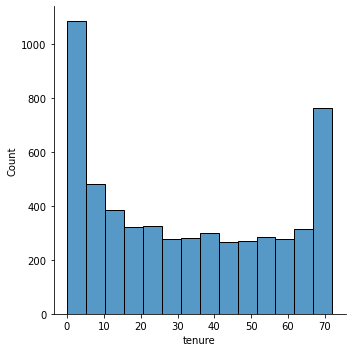

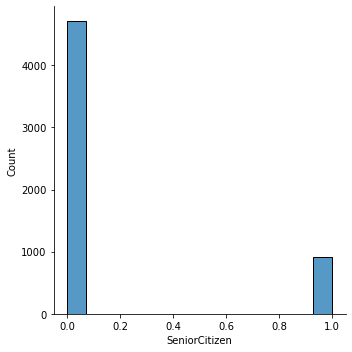

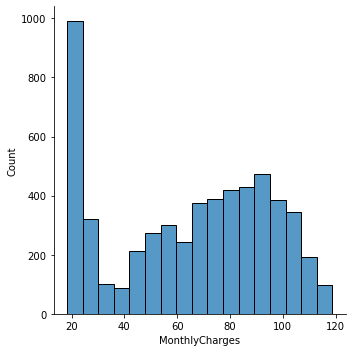

In [8]:
sns.displot(X_train_num['tenure'])
plt.show()

sns.displot(X_train_num['SeniorCitizen'])
plt.show()

sns.displot(X_train_num['MonthlyCharges'])
plt.show()

In [9]:
#Scaling X_train:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(X_train_num)
X_train_scaled = transformer.transform(X_train_num) 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)

#Comparing Train set before and after scaling:

display(X_train.head())
display(X_train_scaled.head())
print(X_train_scaled.isna().sum())

,tenure,SeniorCitizen,MonthlyCharges
344,41,0,20.25
5226,12,0,21.15
1043,32,0,69.75
1699,42,0,20.65
1948,2,0,80.75


,tenure,SeniorCitizen,MonthlyCharges
0,0.569444,0.0,0.019900
1,0.166667,0.0,0.028856
2,0.444444,0.0,0.512438
3,0.583333,0.0,0.023881
4,0.027778,0.0,0.621891


tenure            0
SeniorCitizen     0
MonthlyCharges    0
dtype: int64


### Build the logistic regression model.

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

/Users/Hector_Martin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [12]:
# apply scaler to X_test_num
X_test_scaled = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)
display(X_test_scaled.head())
print(X_test_scaled.isna().sum())

,tenure,SeniorCitizen,MonthlyCharges
0,0.180556,0.0,0.016915
1,0.166667,1.0,0.652239
2,0.847222,0.0,0.873134
3,0.472222,0.0,0.078109
4,0.388889,0.0,0.376119


tenure            0
SeniorCitizen     0
MonthlyCharges    0
dtype: int64


### Evaluate the model.


In [13]:
#Checking the probability of getting each outcome:

lr.predict_proba(X_train_scaled)

array([[0.96697291, 0.03302709],
       [0.85597108, 0.14402892],
       [0.80039542, 0.19960458],
       ...,
       [0.58829576, 0.41170424],
       [0.67458801, 0.32541199],
       [0.97531299, 0.02468701]])

In [14]:
#Checking the predicted outcome of our Model:

#On X_Train:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("The first predictions on the TRAIN set are: ",y_train_pred[:5])
print("The first predictions on the TEST set are: ",y_test_pred[:5])

The first predictions on the TRAIN set are:  ['No' 'No' 'No' 'No' 'Yes']
The first predictions on the TEST set are:  ['No' 'Yes' 'No' 'No' 'No']


### Checking the linear relationship between the predicted outcomes of 'y' against X_train

**Linnear model formula reminder!**

$$log(\frac{p}{1-p}) = (b_{0}+b_{1}x_{1}+...)$$

In [15]:
#Checking the linear relationship between the predicted outcomes of 'y' against X_train:

#log of all the outcomes from column 1/log of all outcomes from column 0
#Plain language: log of the probability of A divided by log 1 - the probability of B
#Same as the formula above

logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(lr.predict_proba(X_train_scaled)[:,0])) 

#Alternative code for the same:

#logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1])) 

In [16]:
X_train_scaled.columns

Index(['tenure', 'SeniorCitizen', 'MonthlyCharges'], dtype='object')

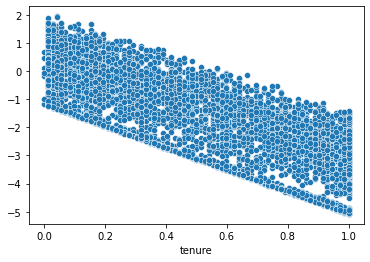

In [17]:
sns.scatterplot(y = logits,x = X_train_scaled['tenure']);
plt.show()

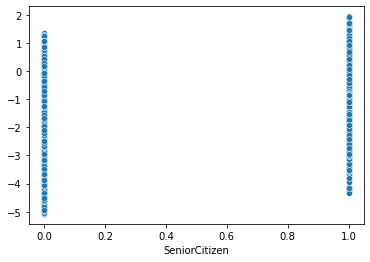

In [18]:
#QUESTION: Here's a non-existent linear relationship - is this bad??

sns.scatterplot(y = logits,x = X_train_scaled['SeniorCitizen']);
plt.show()

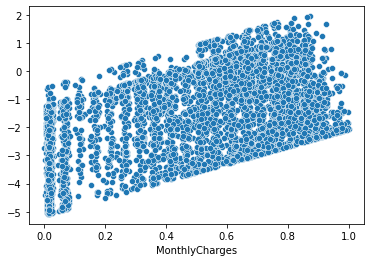

In [19]:
sns.scatterplot(y = logits,x = X_train_scaled['MonthlyCharges']);
plt.show()

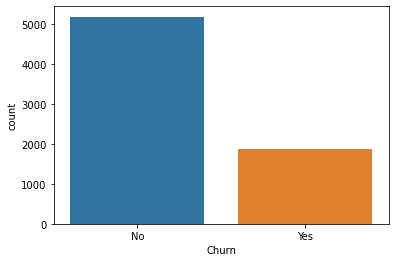

In [20]:
#Checking the imbalance of samples on 'y'
#There's a clear imbalance between samples

sns.countplot(x='Churn', data=y)
plt.show()


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

### Confusion Matrix on Train Set:

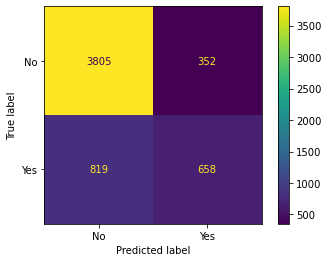

In [22]:
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train,display_labels=lr.classes_);
disp.plot()
plt.show()


### Confusion Matrix on Test Set:

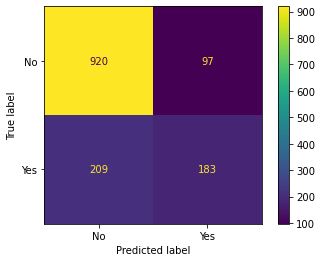

In [23]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=lr.classes_);
disp.plot()
plt.show()

In [24]:
print('Regular Logistic Regression Results: \n')
print("The accuracy in the TRAIN set is: {:.2f}".format(accuracy_score(y_train,y_train_pred)))
print("The precision in the TRAIN set is: {:.2f}".format(precision_score(y_train,y_train_pred, pos_label = 'No')))
print("The recall in the TRAIN set is: {:.2f}".format(recall_score(y_train,y_train_pred, pos_label = 'No')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_train,y_train_pred, pos_label = 'No')))
print('\n')
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred, pos_label = 'No')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred, pos_label = 'No')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred, pos_label = 'No')))
print('\n')
print('The Classification Report on Train set:')
print('\n')
print(classification_report(y_train, y_train_pred,target_names=['No','Yes']))
print('\n')
print('The Classification Report on Test set:')
print('\n')
print(classification_report(y_test, y_test_pred,target_names=['No','Yes']))

Regular Logistic Regression Results: 

The accuracy in the TRAIN set is: 0.79
The precision in the TRAIN set is: 0.82
The recall in the TRAIN set is: 0.92
The F1 in the TEST set is: 0.87


The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.81
The recall in the TEST set is: 0.90
The F1 in the TEST set is: 0.86


The Classification Report on Train set:


              precision    recall  f1-score   support

          No       0.82      0.92      0.87      4157
         Yes       0.65      0.45      0.53      1477

    accuracy                           0.79      5634
   macro avg       0.74      0.68      0.70      5634
weighted avg       0.78      0.79      0.78      5634



The Classification Report on Test set:


              precision    recall  f1-score   support

          No       0.81      0.90      0.86      1017
         Yes       0.65      0.47      0.54       392

    accuracy                           0.78      1409
   macro avg       0.73      0.69 

### Even a simple model will give us more than 70% accuracy. Why?

In [25]:
#Because our model is very good at predicting True variables

### Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
#KNEIGHBORS controls the size of the neighbourhood
#to determine where to add the fake sample
sm = SMOTE(random_state=100,k_neighbors=3) 
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)
X_test_SMOTE,y_test_SMOTE = sm.fit_resample(X_test_scaled,y_test)

In [28]:
#Checking shapes before and after the balance on X_train:

print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8314, 3)


In [29]:
#Checking shapes before and after the balance on X_test:

print(X_test.shape)
print(X_test_SMOTE.shape)

(1409, 3)
(2034, 3)


In [30]:
#Applying the Logistic Regression:

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

/Users/Hector_Martin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

### Confusion Matrix after SMOTE balancing

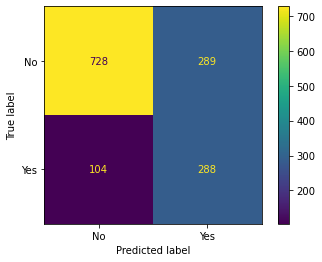

In [32]:
cm_test = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [33]:
print("SMOTE Results: \n")
print("The accuracy in the TRAIN set is: {:.2f}".format(accuracy_score(y_train,y_train_pred)))
print("The precision in the TRAIN set is: {:.2f}".format(precision_score(y_train,y_train_pred, pos_label = 'No')))
print("The recall in the TRAIN set is: {:.2f}".format(recall_score(y_train,y_train_pred, pos_label = 'No')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_train,y_train_pred, pos_label = 'No')))
print('\n')
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred, pos_label = 'No')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred, pos_label = 'No')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred, pos_label = 'No')))
print('\n')
print('The Classification Report on Train set:')
print('\n')
print(classification_report(y_train, y_train_pred,target_names=['No','Yes']))
print('\n')
print('The Classification Report on Test set:')
print('\n')
print(classification_report(y_test, y_test_pred,target_names=['No','Yes']))

SMOTE Results: 

The accuracy in the TRAIN set is: 0.73
The precision in the TRAIN set is: 0.89
The recall in the TRAIN set is: 0.73
The F1 in the TEST set is: 0.80


The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.88
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.79


The Classification Report on Train set:


              precision    recall  f1-score   support

          No       0.89      0.73      0.80      4157
         Yes       0.49      0.74      0.59      1477

    accuracy                           0.73      5634
   macro avg       0.69      0.74      0.70      5634
weighted avg       0.78      0.73      0.75      5634



The Classification Report on Test set:


              precision    recall  f1-score   support

          No       0.88      0.72      0.79      1017
         Yes       0.50      0.73      0.59       392

    accuracy                           0.72      1409
   macro avg       0.69      0.73      0.69      1409
we

In [34]:
#Based on the results of the Error Metrics we can see that the model got worse scores accross all fields 
#after applying the SMOTE